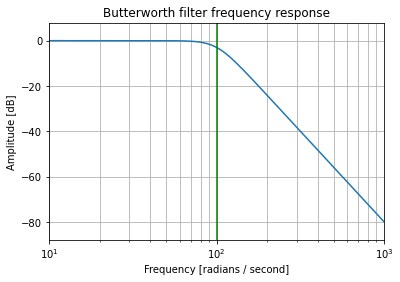

In [44]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

waveforms = np.load("exported_waveforms.npy", allow_pickle=True)

b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

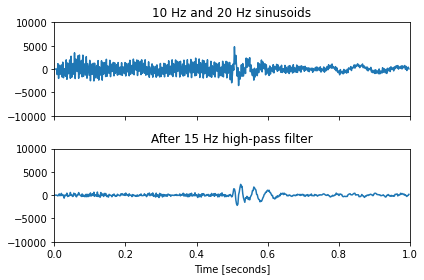

In [43]:
t = np.linspace(0, 1, 513, False)  # 1 second
#sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t) + np.sin(2*np.pi*30*t)
sig = waveforms[5]['raw_data']
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -10000, 10000])

sos = signal.butter(10, [3000,43000], 'bp', fs=1/9.142e-6, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -10000, 10000])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()